# Task 1: Titanic Survival Classification
Use the Titanic dataset, build a machine learning model to predict whether a passenger survived or not based on features like age, gender, ticket class, and fare. Your task is to clean and preprocess the data, train a classification model, and evaluate its performance.

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Matplotlib is building the font cache; this may take a moment.


# Reading & analyze dataset

In [2]:
db = pd.read_csv("train.csv")

In [3]:
db.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
db.shape

(891, 12)

In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


# Data preprocessing

In [6]:
db.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
db2 = db.copy()
db2 = db2.drop("Cabin",axis=1)
db2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
db2['Age'] = db2['Age'].fillna(db2['Age'].mean())
db2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [9]:
db2['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [10]:
db2['Embarked'] = db2['Embarked'].fillna(db2['Embarked'].mode()[0])
db2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data visualization

In [11]:
db2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Survived
0    549
1    342
Name: count, dtype: int64


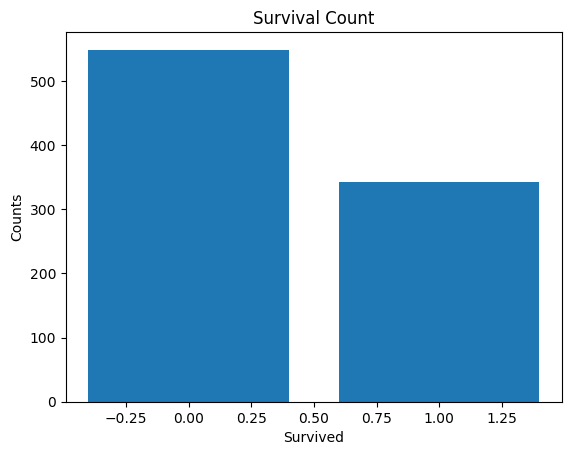

In [12]:
counts = db2['Survived'].value_counts()
print(counts)
plt.bar(counts.index, counts.values)
plt.xlabel('Survived')  # Move xlabel to proper function
plt.ylabel('Counts')
plt.title('Survival Count')  # Add a title for clarity
plt.show()

Sex
male      577
female    314
Name: count, dtype: int64


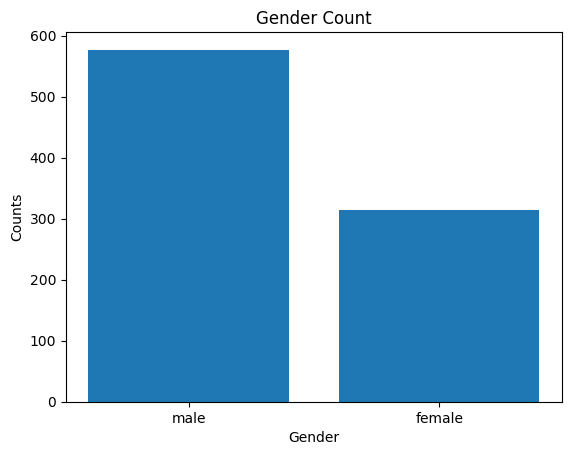

In [13]:
sex_counts = db2['Sex'].value_counts()
print(sex_counts)
plt.bar(sex_counts.index, sex_counts.values)
plt.xlabel('Gender')  # Move xlabel to proper function
plt.ylabel('Counts')
plt.title('Gender Count')  # Add a title for clarity
plt.show()

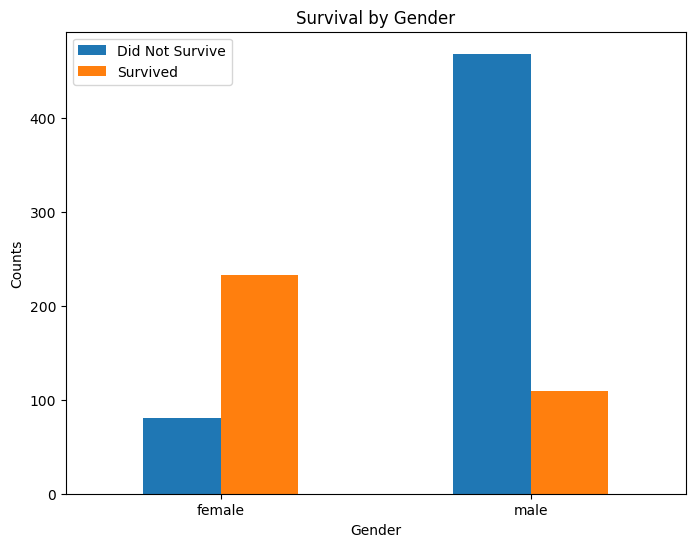

In [14]:
# Create a cross-tabulation of Sex vs Survived
survival_by_sex = pd.crosstab(db2['Sex'], db2['Survived'])
# Plot grouped bar chart
survival_by_sex.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Survival by Gender')
plt.legend(['Did Not Survive', 'Survived'])
plt.xticks(rotation=0)
plt.show()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


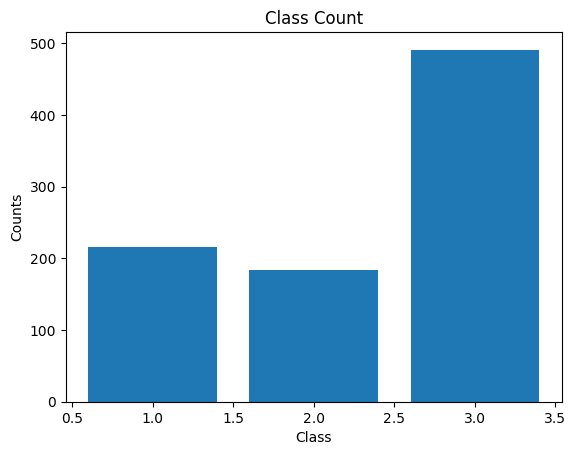

In [15]:
class_counts = db2['Pclass'].value_counts()
print(class_counts)
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')  # Move xlabel to proper function
plt.ylabel('Counts')
plt.title('Class Count')  # Add a title for clarity
plt.show()

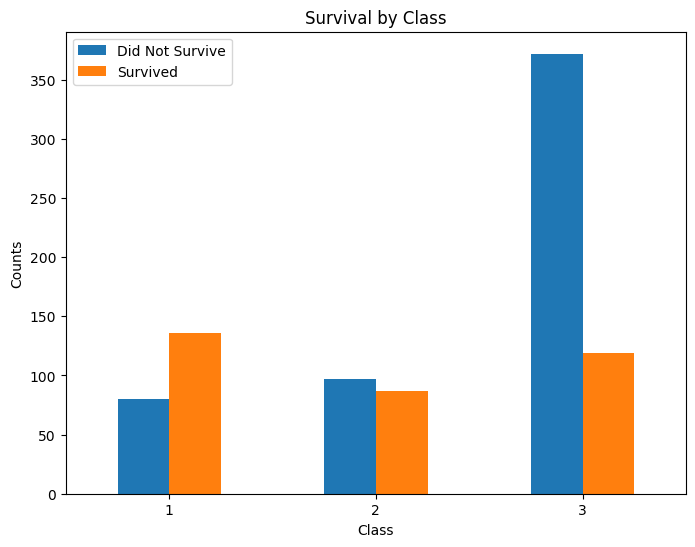

In [16]:
# Create a cross-tabulation of Class vs Survived
survival_by_class = pd.crosstab(db2['Pclass'], db2['Survived'])
# Plot grouped bar chart
survival_by_class.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Class')
plt.ylabel('Counts')
plt.title('Survival by Class')
plt.legend(['Did Not Survive', 'Survived'])
plt.xticks(rotation=0)
plt.show()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64


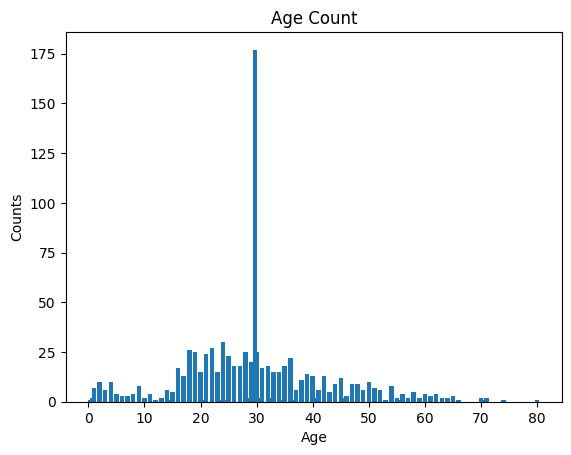

In [17]:
age_counts = db2['Age'].value_counts()
print(age_counts)
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age')  # Move xlabel to proper function
plt.ylabel('Counts')
plt.title('Age Count')  # Add a title for clarity
plt.show()

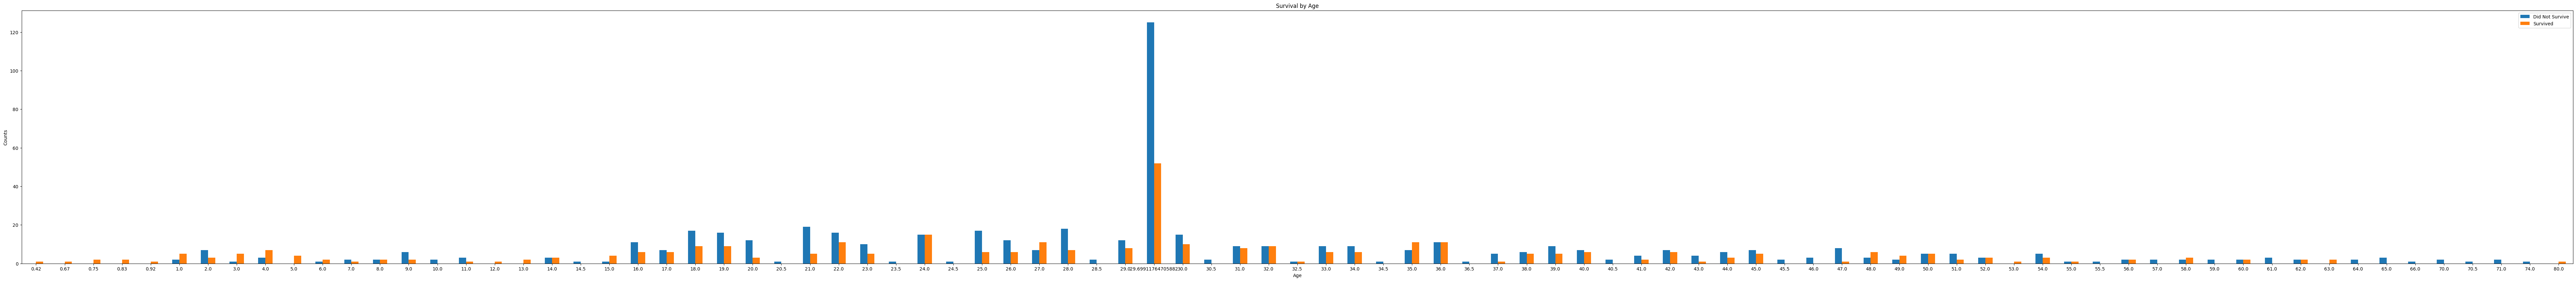

In [18]:
# Create a cross-tabulation of Age vs Survived
survival_by_age = pd.crosstab(db2['Age'], db2['Survived'])
# Plot grouped bar chart
survival_by_age.plot(kind='bar', figsize=(100, 10))
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Survival by Age')
plt.legend(['Did Not Survive', 'Survived'])
plt.xticks(rotation=0)
plt.show()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64


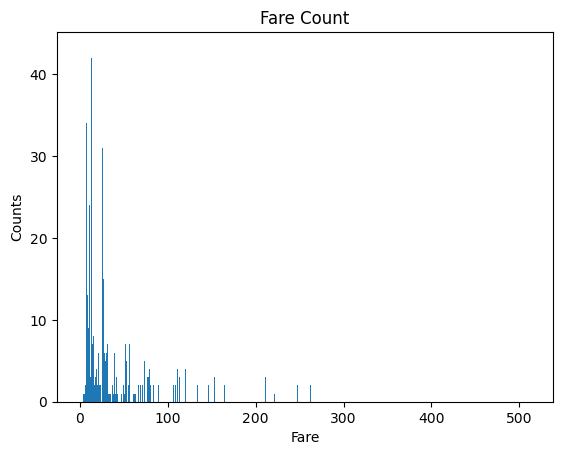

In [19]:
fare_counts = db2['Fare'].value_counts()
print(fare_counts)
plt.bar(fare_counts.index, fare_counts.values)
plt.xlabel('Fare')  # Move xlabel to proper function
plt.ylabel('Counts')
plt.title('Fare Count')  # Add a title for clarity
plt.show()

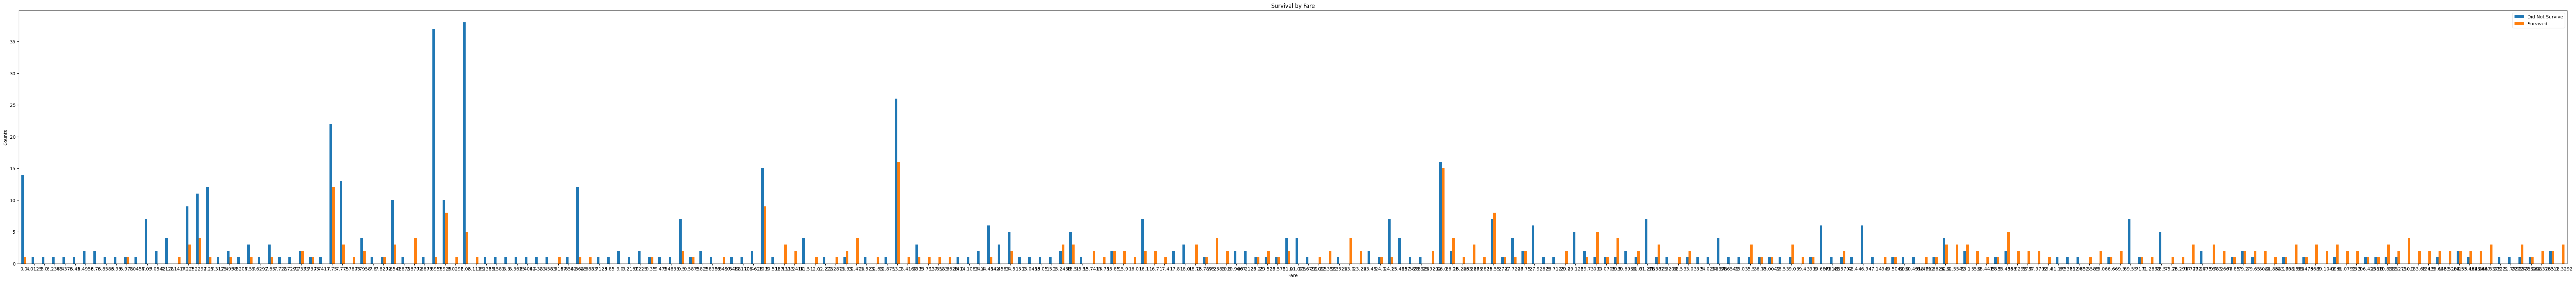

In [20]:
# Create a cross-tabulation of Fare vs Survived
survival_by_fare = pd.crosstab(db2['Fare'], db2['Survived'])
# Plot grouped bar chart
survival_by_fare.plot(kind='bar', figsize=(100, 10))
plt.xlabel('Fare')
plt.ylabel('Counts')
plt.title('Survival by Fare')
plt.legend(['Did Not Survive', 'Survived'])
plt.xticks(rotation=0)
plt.show()

# Encoding categorical variables

In [21]:
db2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [32]:
# Import only nominal encoder (OHE) from scikit learn library b/c there is no ordinal data for LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_columns = ['Sex', 'Embarked']

# Initialize and fit the encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
one_hot_encoded = encoder.fit_transform(db2[categorical_columns])

# Create DataFrame with encoded features
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Combine with original dataset and drop original categorical columns
db2_encoded = pd.concat([db2, one_hot_df], axis=1).drop(categorical_columns, axis=1)
db2_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0.0,1.0,0.0,0.0,1.0


# Separation of features & target

In [33]:
X = db2_encoded.drop(columns=['PassengerId','Name','Ticket','Survived'], axis=1) # Features (independent variables)
Y = db2_encoded['Survived'] # Target (dependent variable)
print(X,Y)

     Pclass        Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0         3  22.000000      1      0   7.2500         0.0       1.0   
1         1  38.000000      1      0  71.2833         1.0       0.0   
2         3  26.000000      0      0   7.9250         1.0       0.0   
3         1  35.000000      1      0  53.1000         1.0       0.0   
4         3  35.000000      0      0   8.0500         0.0       1.0   
..      ...        ...    ...    ...      ...         ...       ...   
886       2  27.000000      0      0  13.0000         0.0       1.0   
887       1  19.000000      0      0  30.0000         1.0       0.0   
888       3  29.699118      1      2  23.4500         1.0       0.0   
889       1  26.000000      0      0  30.0000         0.0       1.0   
890       3  32.000000      0      0   7.7500         0.0       1.0   

     Embarked_C  Embarked_Q  Embarked_S  
0           0.0         0.0         1.0  
1           1.0         0.0         0.0  
2           0.0      

# Splitting into train & test data

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2) # 80% training 20% testing data split
print(X.shape,X_train.shape,X_test.shape)

(891, 10) (712, 10) (179, 10)


# Training & evaluation of various classification based model via GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [73]:
# Train + Evaluate each using GridSearchCV
print("==========MODEL SUMMARY===========")

# Store results here
results = {}

for name, model in models.items():
    print("\n==================================")
    print("MODEL:", name)
    
    grid = GridSearchCV(model, {}, cv=5)
    grid.fit(X_train, Y_train)
    
    # Accuracy
    train_acc = accuracy_score(Y_train, grid.predict(X_train))
    test_acc = accuracy_score(Y_test, grid.predict(X_test))
    
    results[name] = [train_acc, test_acc]
    print("Train Accuracy:", train_acc)
    print("Test Accuracy :", test_acc)

==========MODEL SUMMARY===========

MODEL: Logistic Regression
Train Accuracy: 0.8103932584269663
Test Accuracy : 0.7877094972067039

MODEL: SVM
Train Accuracy: 0.6797752808988764
Test Accuracy : 0.6368715083798883

MODEL: KNN
Train Accuracy: 0.8132022471910112
Test Accuracy : 0.6815642458100558

MODEL: Decision Tree
Train Accuracy: 0.9859550561797753
Test Accuracy : 0.776536312849162

MODEL: Random Forest
Train Accuracy: 0.9859550561797753
Test Accuracy : 0.8100558659217877


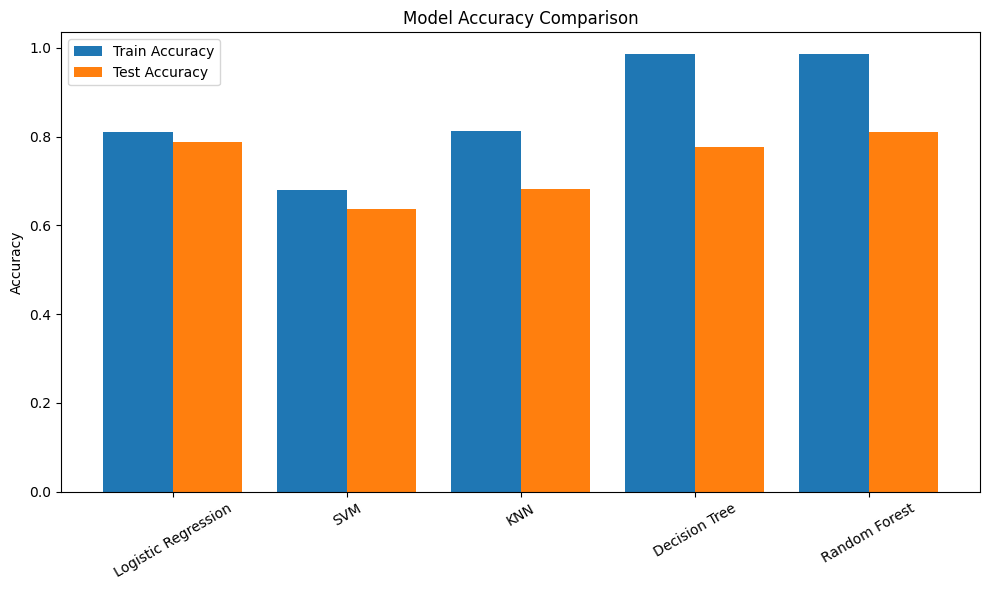

In [74]:
models_list = list(results.keys())
train_acc_list = [results[m][0] for m in models_list]
test_acc_list = [results[m][1] for m in models_list]

plt.figure(figsize=(10,6))

x = range(len(models_list))

# Bars
plt.bar(x, train_acc_list, width=0.4, label='Train Accuracy')
plt.bar([i+0.4 for i in x], test_acc_list, width=0.4, label='Test Accuracy')

plt.xticks([i+0.2 for i in x], models_list, rotation=30)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend()
plt.tight_layout()
plt.show()